# 高齢化率と地価のクラスタ分析(今回は使用せず)

In [6]:
cd /Users/shintaro/Downloads

/Users/shintaro/Downloads


In [7]:
import pandas as pd
import math

In [8]:
data = pd.read_csv("/Users/shintaro/Downloads/クラスター分析/人口データ.csv")

In [9]:
data

調査年           地域 可住地面積１km2当たり人口密度【人】 昼夜間人口比率【％】 外国人人口（人口10万人当たり）【人】  \
0     2015年度      北海道 札幌市              4433.5      100.4               451.8   
1     2015年度  北海道 札幌市 中央区              8856.8      162.7               795.8   
2     2015年度   北海道 札幌市 北区              4515.3       95.9                 709   
3     2015年度   北海道 札幌市 東区              4598.2       94.6                 428   
4     2015年度  北海道 札幌市 白石区              6090.8       98.6               283.9   
...      ...          ...                 ...        ...                 ...   
1911  2015年度     沖縄県 久米島町                 194      100.5               438.4   
1912  2015年度     沖縄県 八重瀬町              1163.1         86               206.4   
1913  2015年度     沖縄県 多良間村                75.2       98.8              1172.5   
1914  2015年度      沖縄県 竹富町                70.7        105               950.5   
1915  2015年度     沖縄県 与那国町               151.2      102.6               596.9   

     15歳未満人口割合【％】 15～64歳人口割合【％】 65歳以上人口割合【％】 未婚者割合（15歳以上人口）【％】 人口増減率【％】  ...  \
0           11.32        63.283       24.767          29.83508     2.03  ...   
1          10.099        67.475       21.267          36.29654     7.92  ...   
2          11.536        62.719       24.169          30.80597     2.35  ...   
3          11.728        64.259       23.461          30.39551     2.36  ...   
4          11.256         65.31       22.845          31.27262     2.61  ...   
...           ...           ...          ...               ...      ...  ...   
1911       15.706        57.705        26.46          27.68735    -8.97  ...   
1912       18.286        61.969       19.301          30.53678     8.94  ...   
1913        17.42        56.198       26.382          24.44219    -3.01  ...   
1914       17.009        61.756        19.96            31.146      3.6  ...   
1915       12.534        68.964       18.502          26.81564    11.23  ...   

     転入率（日本人移動者）【％】 転出率（日本人移動者）【％】 核家族世帯割合【％】 高齢夫婦のみの世帯の割合【％】 高齢単身世帯の割合【％】  \
0              6.19           5.78      53.63           10.72        11.37   
1              9.02           7.63      39.98            7.24        10.93   
2              5.65           5.19      52.53           10.65           11   
3               6.1           5.53       52.8            9.78        11.31   
4              6.67           6.45      49.24            8.61         11.4   
...             ...            ...        ...             ...          ...   
1911           5.22           5.98      53.51            9.85        12.65   
1912           5.91           4.46      68.12            7.75         7.38   
1913           4.52           7.54      57.02           10.43        10.85   
1914          14.53          13.56      39.23            5.99          9.9   
1915           8.74           8.36      29.47            5.65         7.88   

       総人口【人】  総人口（男）【人】  総人口（女）【人】  地価公示　商業地最高価格  地価公示　住宅地平均価格  
0     1952356     910614    1041742        5350.0       82500.0  
1      237627     107756     129871        5350.0      178300.0  
2      285321     134534     150787        2400.0       70200.0  
3      261912     124649     137263         376.0       81100.0  
4      209584      99020     110564         333.0       85100.0  
...       ...        ...        ...           ...           ...  
1911     7755       4086       3669           NaN           NaN  
1912    29066      14247      14819           NaN       67800.0  
1913     1194        639        555           NaN           NaN  
1914     3998       2057       1941           NaN           NaN  
1915     1843       1147        696           NaN           NaN  

[1916 rows x 21 columns]

In [10]:
len_data1 = len(data)
len_data1

1916

In [11]:
columns = data.columns

pref_name = data[columns[1]].tolist()
data1 = data[columns[2]].tolist()
data2 = data[columns[3]].tolist()
data3 = data[columns[4]].tolist()
data4 = data[columns[5]].tolist()
data5 = data[columns[6]].tolist()
data6 = data[columns[7]].tolist()
data7 = data[columns[8]].tolist()
data8 = data[columns[9]].tolist()
data9 = data[columns[10]].tolist()
data10 = data[columns[11]].tolist()
data11 = data[columns[12]].tolist()
data12 = data[columns[13]].tolist()
data13 = data[columns[14]].tolist()
data14 = data[columns[15]].tolist()
data15 = data[columns[16]].tolist()
data16 = data[columns[17]].tolist()
data17 = data[columns[18]].tolist()
data18 = data[columns[19]].tolist()
data19 = data[columns[20]].tolist()

Dataset = [[]for i in range(20)]
Data_proc_tmp = [[]for i in range(20)]

Dataset[0] = data1
Dataset[1] = data2
Dataset[2] = data3
Dataset[3] = data4
Dataset[4] = data5
Dataset[5] = data6
Dataset[6] = data7
Dataset[7] = data8
Dataset[8] = data9 
Dataset[9] = data10
Dataset[10] = data11
Dataset[11] = data12
Dataset[12] = data13
Dataset[13] = data14
Dataset[14] = data15
Dataset[15] = data16
Dataset[16] = data17
Dataset[17] = data18
Dataset[18] = data19
Dataset[19] = pref_name

for i in range(len_data1):
    if Dataset[0][i] != '-' and Dataset[1][i] != '-' and Dataset[2][i] != '-' and Dataset[3][i] != '-' and Dataset[4][i] != '-' and Dataset[5][i] != '-' and Dataset[6][i] != '-' and Dataset[7][i] != '-' and Dataset[8][i] != '-' and Dataset[9][i] != '-' and Dataset[10][i] != '-' and Dataset[11][i] != '-' and Dataset[12][i] != '-' and Dataset[13][i] != '-' and Dataset[14][i] != '-' and Dataset[15][i] != '-' and Dataset[16][i] != '-' and Dataset[17][i] != '-' and Dataset[18][i] != '-':
        for j in range(20):
            Data_proc_tmp[j].append(Dataset[j][i])
            
Data_proc_tmp1 = [[]for i in range(20)]

len_data1_tmp = len(Data_proc_tmp[0])

for i in range(len_data1_tmp):
    if not math.isnan(Data_proc_tmp[17][i]) and not math.isnan(Data_proc_tmp[18][i]):
        for j in range(20):
            Data_proc_tmp1[j].append(Data_proc_tmp[j][i])
            
len_data2 = len(Data_proc_tmp1[0])
Data_proc = [[]for i in range(20)]

for i in range(19):
    for j in range(len_data2):
        Data_proc[i].append(float(Data_proc_tmp1[i][j]))

for i in range(len_data2):
    Data_proc[19].append(Data_proc_tmp1[19][i])

Dataframe = [[]for i in range(20)]

for i in range(len_data2):
    if Data_proc[7][i] > -80:
        for j in range(20):
            Dataframe[j].append(Data_proc[j][i])
            
len_Data = len(Dataframe[0])

In [12]:
len_Data

1367

In [13]:
Dataframe[18]

[82500.0,
 178300.0,
 70200.0,
 81100.0,
 85100.0,
 107100.0,
 41600.0,
 89100.0,
 81200.0,
 50900.0,
 54400.0,
 39500.0,
 16200.0,
 20000.0,
 15800.0,
 17500.0,
 25800.0,
 14700.0,
 3000.0,
 11300.0,
 18700.0,
 11800.0,
 15800.0,
 11700.0,
 5000.0,
 5800.0,
 27900.0,
 3900.0,
 8100.0,
 8700.0,
 8700.0,
 5400.0,
 11100.0,
 29600.0,
 6800.0,
 6700.0,
 8600.0,
 21800.0,
 13100.0,
 24500.0,
 16400.0,
 24700.0,
 18000.0,
 19600.0,
 7800.0,
 8600.0,
 10000.0,
 10300.0,
 14900.0,
 6000.0,
 14800.0,
 10300.0,
 10900.0,
 72400.0,
 9000.0,
 4000.0,
 8700.0,
 6300.0,
 5200.0,
 9600.0,
 9400.0,
 5800.0,
 7700.0,
 11600.0,
 2500.0,
 9200.0,
 11000.0,
 2500.0,
 2500.0,
 6600.0,
 5400.0,
 12800.0,
 8500.0,
 9800.0,
 3800.0,
 5600.0,
 4900.0,
 8000.0,
 5300.0,
 10400.0,
 5100.0,
 10200.0,
 12900.0,
 18600.0,
 6900.0,
 6200.0,
 6500.0,
 6400.0,
 5800.0,
 9400.0,
 8000.0,
 18800.0,
 13500.0,
 33200.0,
 28500.0,
 32600.0,
 12500.0,
 18000.0,
 18300.0,
 30900.0,
 12500.0,
 7100.0,
 9600.0,
 7700.0,
 7500

In [14]:
X = [[]for i in range(len_Data)]

In [15]:
for i in range(len_Data):
    X[i].append(Dataframe[7][i])
    X[i].append(Dataframe[18][i])
    
import numpy as np
X = np.array(X)

In [16]:
x1 = np.array(Dataframe[7])
x2 = np.array(Dataframe[18])

print(np.cov(x1, x2))
print(np.corrcoef(x1, x2))

[[2.42388534e+01 3.68844937e+05]
 [3.68844937e+05 2.09113999e+10]]
[[1.        0.5180793]
 [0.5180793 1.       ]]


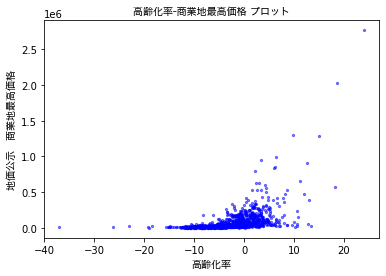

In [17]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import sys
if sys.platform.startswith('win'):
    FontPath = 'C:\\Windows\\Fonts\\meiryo.ttc'
elif sys.platform.startswith('darwin'):
    FontPath = '/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc'
elif sys.platform.startswith('linux'):
    FontPath = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
else:
    print('このPythonコードが対応していないOSを使用しています．')
    sys.exit()
jpfont = FontProperties(fname = FontPath)
plt.scatter(Dataframe[7], Dataframe[18], marker = 'o', s = 5, color = 'b', alpha = 0.5)
plt.xlabel("高齢化率", fontproperties = jpfont)
plt.ylabel("地価公示　商業地最高価格", fontproperties = jpfont)
plt.title("高齢化率-商業地最高価格 プロット", fontproperties = jpfont)
#plt.savefig('高齢化率-人口増加率', dpi = 2000)
plt.show()

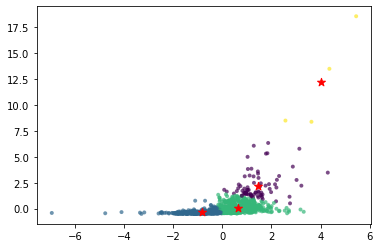

In [18]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)
cls = KMeans(n_clusters = 4)
result = cls.fit(X_norm)
plt.scatter(X_norm[:,0], X_norm[:,1], marker = 'o', linewidth = 0.05, s = 15, c = result.labels_, alpha = 0.7)
plt.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], s = 70, marker = '*', c = 'red')
#plt.savefig('クラスタリング-7', dpi = 2000)
plt.show()

In [19]:
model = KMeans(n_clusters=7).fit(X)

'\nfor j in range(X.shape[0]):\n    color = tuple((round(data[j][0]/256, 3), round(data[j][1]/256, 3), round(data[j][2]/256, 3)))\n\n    plt.scatter(pca_data[j,0], pca_data[j,1], c=color)\n\nplt.show()\n'

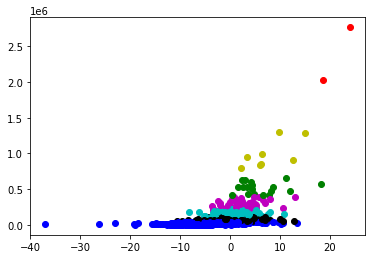

<Figure size 432x288 with 0 Axes>

In [20]:
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], c=color[int(model.labels_[i])])

plt.figure()
"""
for j in range(X.shape[0]):
    color = tuple((round(data[j][0]/256, 3), round(data[j][1]/256, 3), round(data[j][2]/256, 3)))

    plt.scatter(pca_data[j,0], pca_data[j,1], c=color)

plt.show()
"""

In [21]:
l = model.labels_.tolist()
for i in range(7):
    print(l.count(i))
    
#color = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

881
18
2
138
63
8
257


460代：　青
430代：　黄
410代：　マゼンタ
290代：　緑
170代：　赤
100代：　シアン
20代：　　黒

In [22]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans

In [23]:
pred = KMeans(n_clusters = 7).fit_predict(X)
pred.tolist()

[0,
 4,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 3,
 0,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [24]:
dict = {'地域': Dataframe[0], '可住地面積１km2当たり人口密度【人】': Dataframe[1], '昼夜間人口比率【％】': Dataframe[2], '外国人人口（人口10万人当たり）【人】': Dataframe[3], '15歳未満人口割合【％】': Dataframe[4], '15～64歳人口割合【％】': Dataframe[5], '65歳以上人口割合【％】': Dataframe[6], '未婚者割合（15歳以上人口）【％】': Dataframe[7],
       '人口増減率【％】': Dataframe[8], '転入超過率（日本人移動者）【％】': Dataframe[9], '転入率（日本人移動者）【％】': Dataframe[10], '転出率（日本人移動者）【％】': Dataframe[11],'核家族世帯割合【％】': Dataframe[12], '高齢夫婦のみの世帯の割合【％】': Dataframe[13], '高齢単身世帯の割合【％】': Dataframe[14], '総人口【人】': Dataframe[15], '総人口（男）【人】': Dataframe[16],'総人口（女）【人】': Dataframe[17]}
DF = pd.DataFrame(dict)

In [25]:
DF['cluster_id10'] = pred

In [26]:
#DF.to_csv('クラスタリング(高齢化率-人口増加率).csv)

In [27]:
DF['cluster_id10'].value_counts()

3    932
0    240
4    116
6     54
2     15
5      8
1      2
Name: cluster_id10, dtype: int64

In [28]:
color = ['b', 'g', 'r', 'c', 'm', 'y']

for i in range(Y.shape[0]):
    plt.scatter(Y[i,0], Y[i,1], c = color[int(model.labels_[i])])
#plt.savefig('転入超過率クラスタリング', dpi = 2000)
plt.figure()

NameError: name 'Y' is not defined

In [ ]:
DF

In [ ]:
from matplotlib import pyplot
from numpy import where
from sklearn.manifold import TSNE

#次元圧縮のため、TSNE-Methodを用います
tsne = TSNE(n_components=2, init='pca', random_state=0)
x = tsne.fit_transform(X)

def plot_clusters(X, cluster_ids):
    for class_value in range(3):
        row_ix = where(cluster_ids == class_value)
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    pyplot.show() 

In [ ]:
#K-Means_Method
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(X)
yhat = kmeans_model.predict(X)
plot_clusters(x, yhat) 

In [ ]:
#Gaussian Mixture Model
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3)
model.fit(X)
yhat = model.predict(X)
plot_clusters(x, yhat) 

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
pyplot.plot(K, distortions, 'bx-')
pyplot.xlabel('n_cluster')
pyplot.ylabel('Distortion')
pyplot.title('The Elbow Method showing the optimal k')
pyplot.show() 

In [ ]:
import matplotlib.pyplot as plt
distortions = []

for i  in range(1,11):                # 1~10クラスタまで一気に計算 
    km = KMeans(n_clusters=i,
                init='k-means++',     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)                         # クラスタリングの計算を実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
km = KMeans(n_clusters= 2,            # クラスターの個数
            init='k-means++',        # セントロイドの初期値をランダムに設定
            n_init=10,               # 異なるセントロイドの初期値を用いたk-meansあるゴリmズムの実行回数
            max_iter=300,            # k-meansアルゴリズムの内部の最大イテレーション回数
            tol=1e-04,               # 収束と判定するための相対的な許容誤差
            random_state=0)          # セントロイドの初期化に用いる乱数発生器の状態
y_km = km.fit_predict(X)

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

cluster_labels = np.unique(y_km)       # y_kmの要素の中で重複を無くす
n_clusters=cluster_labels.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

# シルエット係数を計算
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
y_ax_lower, y_ax_upper= 0,0
yticks = []

for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]      # cluster_labelsには 0,1,2が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
        color = cm.jet(float(i)/n_clusters)               # 色の値を作る
        plt.barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                         c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                         height=1.0,                      # 棒の高さ
                         edgecolor='none',                # 棒の端の色
                         color=color)                     # 棒の色
        yticks.append((y_ax_lower+y_ax_upper)/2)          # クラスタラベルの表示位置を追加
        y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
plt.yticks(yticks,cluster_labels + 1)                     # クラスタレベルを表示
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()